In [1]:
#Step1 :Import all necessary librabries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocessing

In [2]:
#Load trainSet and use header to known about trainset
data=pd.read_csv('C:/Users/Gurudeo/Desktop/Personal/BigMart/data.csv')
print(data.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
#describe dataset
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Lets
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
data.Item_Type.value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [6]:
data.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
data.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [8]:
data.Outlet_Location_Type.value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [9]:
data_Missing=data.isnull().sum()


In [10]:
data_Missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

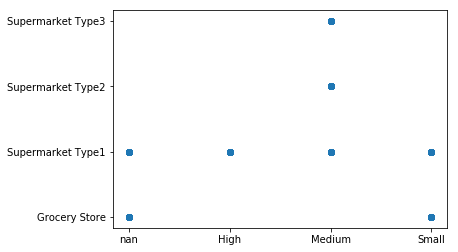

In [11]:
#filling value of Outlet_Size.
#Hypothesis: Outlet_Size depends on Oulet Type and Outlet__Location_Type
plt.scatter(data['Outlet_Size'],data['Outlet_Type'])
plt.show()
#from

In [12]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [13]:
#From above plot and table we can assume that Glacceray shops are of small size
#SO map Glocessary Shop and Size


In [14]:
d={'Grocery Store':'Small'}
s=data.Outlet_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


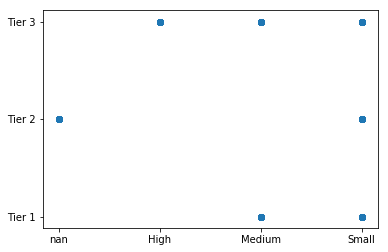

In [15]:
plt.scatter(data['Outlet_Size'],data['Outlet_Location_Type'])
plt.show()


In [16]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
twowaytable


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [17]:
#From plot and table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size


In [18]:
d={'Tier 2':'Small'}
s=data.Outlet_Location_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


In [19]:
data.Outlet_Size.isnull().any()



False

In [20]:
#Fill missing values of weight of Item According to means of Item Identifier

In [21]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))


In [22]:
data.Item_Weight.isnull().sum()


4

In [23]:
#fill Item_Weigth by theire corresponding Item_Type
List=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()
for i in List:
    d={i:Mean_values_Item_Type_data[i]}
    s=data.Item_Type.map(d)
    data.Item_Weight=data.Item_Weight.combine_first(s)
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()


In [24]:
data.Item_Weight.isnull().any()

False

In [25]:
data.Item_Visibility.value_counts()


0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [26]:
#From above observations therir are many zeros for item_Visiblity which not possible so 
#fill by corresponding means of Item_Identifiers
data['Item_Visibility'].replace(0.00000,np.nan)#first fill by nam for simplicity
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8509    0.214306
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [27]:
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
5       0.000000
6       0.012741
7       0.127470
8       0.016687
9       0.094450
10      0.000000
11      0.045464
12      0.100014
13      0.047257
14      0.068024
15      0.069089
16      0.008596
17      0.069196
18      0.034238
19      0.102492
20      0.138190
21      0.035400
22      0.025698
23      0.057557
24      0.025896
25      0.099887
26      0.066693
27      0.019356
28      0.161467
29      0.072222
          ...   
8493    0.025886
8494    0.000000
8495    0.029567
8496    0.021696
8497    0.049209
8498    0.035293
8499    0.037574
8500    0.000000
8501    0.005998
8502    0.070712
8503    0.036133
8504    0.124111
8505    0.094146
8506    0.084676
8507    0.030242
8508    0.043246
8509    0.214306
8510    0.056862
8511    0.026980
8512    0.042801
8513    0.020407
8514    0.054489
8515    0.021518
8516    0.118661
8517    0.083607
8518    0.056783
8519    0.046982
8520    0.0351

In [28]:
data.Item_Visibility.isnull().any()

False

# Feature Engineering


In [29]:
#Fat_Content showing redudancy of differnt types
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [30]:
#Now replace LF by Low Fat ,low fat by lf,reg by Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
#no of years outlet is working conditon 
data['Outlet_Years']=2018-data['Outlet_Establishment_Year']


In [32]:
Mean_Visibility=data['Item_Visibility'].mean()


In [33]:
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x['Item_Visibility']/Mean_Visibility,axis=1)


In [34]:
#As Item Id and Outlet Id


In [35]:
#Convert categorical into numerical 
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
number=LabelEncoder()


In [36]:
#Item_Identifier and outlet_Identifier are also useful for making prediction
data['Outlet']=number.fit_transform(data['Outlet_Identifier'])
data['Identifier']=number.fit_transform(data['Item_Identifier'])


In [37]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])


In [38]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,19,0.242656,9,156
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,9,0.291511,3,8
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,19,0.253434,9,662
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,20,0.000000,0,1121
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,31,0.000000,1,1297


In [39]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Years','Item_Visibility_MeanRatio',
            'Outlet','Identifier','Item_Weight']

In [40]:
seed = 342
np.random.seed(seed)

In [41]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=None)

In [42]:
from scipy.stats import randint, uniform


In [43]:
params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'gamma': [0, 0.5, 1],
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.5, 0.75, 1], 
}

In [44]:
data.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [45]:
X=data[predictors]


In [46]:
y=data['Item_Outlet_Sales']


In [47]:
from sklearn.model_selection import StratifiedKFold


In [48]:
rf=RandomForestRegressor()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)


In [50]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
original_values=y_test

In [52]:
predicted=rf.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(original_values, predicted))

In [54]:
rms

1157.9528507266443

In [60]:
from random import randint as sp_randint

In [62]:
param_dist = {
               "n_estimators": sp_randint(10, 50),
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(1, 2),
              "bootstrap": [True, False],
              "criterion": 'mse'}


In [67]:
from sklearn.model_selection import GridSearchCV

In [70]:
n_iter_search = 20
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [74]:
param_grid = {"max_depth": [3, None],
              "n_estimators": [10, 50],
              "max_features": [5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
             }

In [75]:
grid_rf = GridSearchCV(rf, param_grid=param_grid)


In [76]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'n_estimators': [10, 50], 'max_features': [5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
predicted=grid_rf.predict(X_test)

In [78]:
rms = sqrt(mean_squared_error(original_values, predicted))

In [79]:
rms

1082.9156519640544